Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None

Dataset Description:
               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000


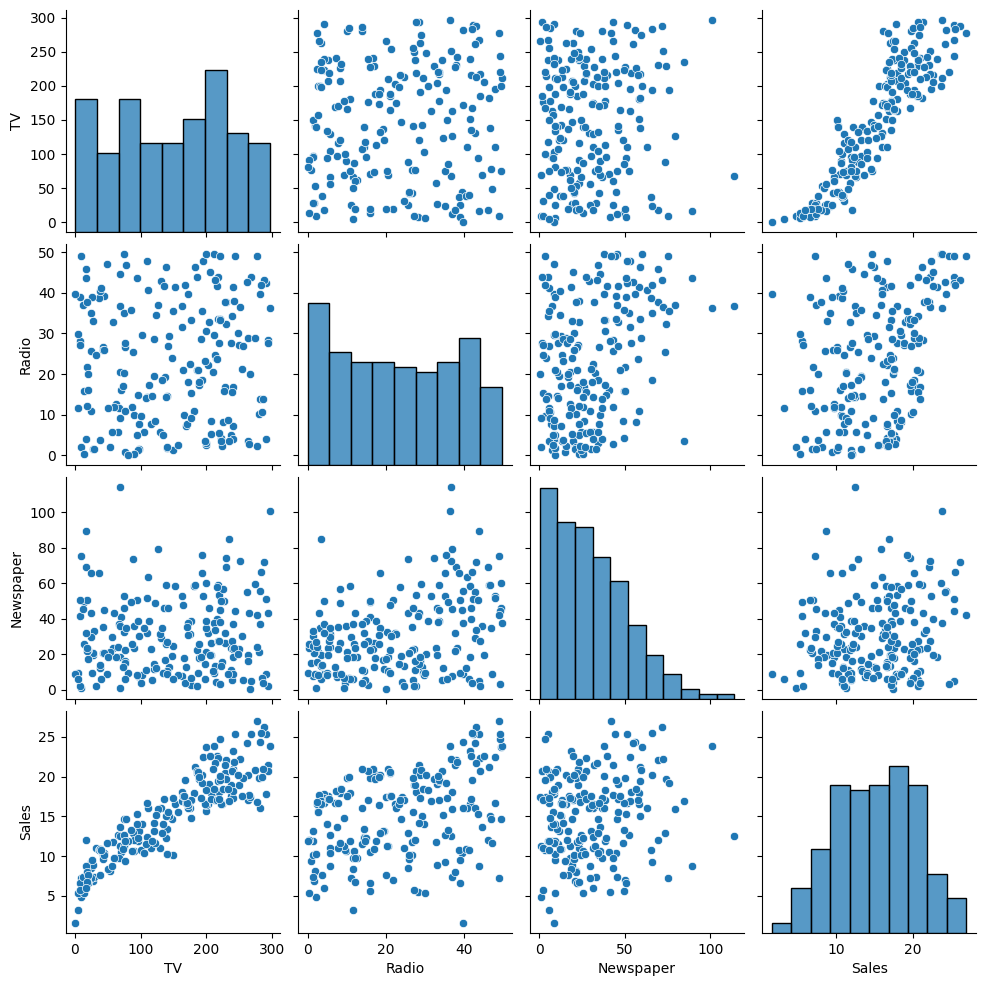

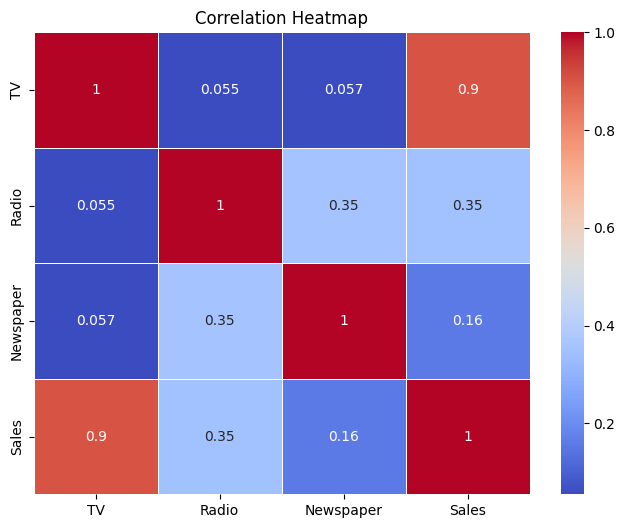


Linear Regression Evaluation:
Mean Absolute Error (MAE): 1.27
Mean Squared Error (MSE): 2.91
R-squared (R2): 0.91

Decision Tree Evaluation:
Mean Absolute Error (MAE): 1.24
Mean Squared Error (MSE): 3.40
R-squared (R2): 0.89

Random Forest Evaluation:
Mean Absolute Error (MAE): 0.92
Mean Squared Error (MSE): 1.44
R-squared (R2): 0.95


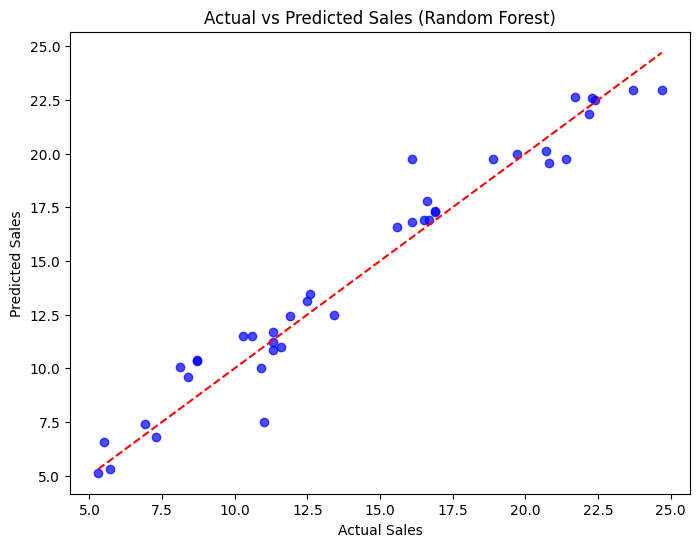


Random Forest model saved as 'sales_prediction_model.pkl'.


In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib  # For saving the trained model

# Step 1: Load the dataset
data = pd.read_csv("C:\\Users\\hp\\OneDrive\\Desktop\\advertising.csv")

# Step 2: Exploratory Data Analysis (EDA)
print("Dataset Information:")
print(data.info())
print("\nDataset Description:")
print(data.describe())

# Visualize relationships between features
sns.pairplot(data)
plt.show()

# Visualize correlation using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# Step 3: Feature Selection
X = data[['TV', 'Radio', 'Newspaper']]  # Independent variables
y = data['Sales']  # Dependent variable

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train and Evaluate Multiple Models
# Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_predictions = linear_model.predict(X_test)

# Decision Tree Regressor
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)
tree_predictions = tree_model.predict(X_test)

# Random Forest Regressor
forest_model = RandomForestRegressor(random_state=42, n_estimators=100)
forest_model.fit(X_train, y_train)
forest_predictions = forest_model.predict(X_test)

# Evaluation Function
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n{model_name} Evaluation:")
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"R-squared (R2): {r2:.2f}")

# Evaluate each model
evaluate_model(y_test, linear_predictions, "Linear Regression")
evaluate_model(y_test, tree_predictions, "Decision Tree")
evaluate_model(y_test, forest_predictions, "Random Forest")

# Step 6: Visualize Actual vs Predicted Sales for the Best Model
best_predictions = forest_predictions  # Assuming Random Forest performs best
plt.figure(figsize=(8, 6))
plt.scatter(y_test, best_predictions, alpha=0.7, color='b')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title("Actual vs Predicted Sales (Random Forest)")
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.show()

# Step 7: Save the Best Model
joblib.dump(forest_model, 'sales_prediction_model.pkl')
print("\nRandom Forest model saved as 'sales_prediction_model.pkl'.")
